In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import geemap,ee
import matplotlib.colors as colors
from shapely.geometry import shape, box, Polygon, mapping, Point
from matplotlib import colors
import shapely
import matplotlib.patches as mpatches
import contextily as ctx
import geemap.colormaps as cm
from shapely.geometry import Point

import warnings

warnings.filterwarnings('ignore')

In [2]:
ee.Authenticate()

True

In [3]:
ee.Initialize(project='ee-snmartinn31')

## Datos del las Masas Lacustres de Chile

Extraidos de https://www.bcn.cl/siit/mapas_vectoriales

In [4]:
rios = gpd.read_file('Masas_Lacustres/masas_lacustres.shp')

Cannot find header.dxf (GDAL_DATA is not defined)


In [5]:
rios.to_crs(4326, inplace=True)

<Axes: >

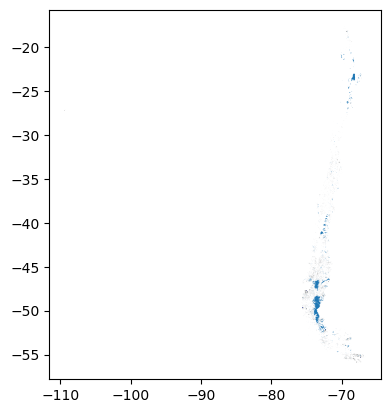

In [6]:
rios.plot()

### Obtener región de interes

In [7]:
glaciar = [[-73.2062204552081,-46.15011764265802],
[-72.64454442981747,-46.15011764265802],
[-72.64454442981747,-45.758670847843604],
[-73.2062204552081,-45.758670847843604],
[-73.2062204552081,-46.15011764265802]]

In [8]:
def getAOI_latlon(dat):
    aoi = ee.Geometry.Polygon(dat)
    return(aoi)

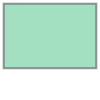

In [9]:
poligono_interes = Polygon(glaciar)
poligono_interes

In [10]:
rios['glaciar'] = poligono_interes

In [11]:
rios.to_crs(4326, inplace=True)

### Calculo de lagos más cercanos al glaciar de interes

In [12]:
def lineas(row):
    nearest_point, _ = shapely.ops.nearest_points(row['geometry_x'], row['geometry_y'])
    return LineString([nearest_point, row['geometry_y']])

In [13]:
def find_nearest_and_distance(row):
    point1, point2 = shapely.ops.nearest_points(row['geometry'], row['glaciar'])
    distance = point1.distance(point2)
    return point1, point2, distance

# Apply the function row-wise and expand the results into separate columns
rios[['nearest_point', 'nearest_glaciar', 'distance']] = rios.apply(lambda row: pd.Series(find_nearest_and_distance(row)), axis=1)

In [14]:
rios.sort_values(by='distance')[:100]

,objectid,st_area_sh,st_length_,Nombre,Tipo,geometry,glaciar,nearest_point,nearest_glaciar,distance
16065,16517,6.826567e+05,7942.990377,Caja Rios,None,"POLYGON ((-72.91440 -46.15712, -72.91595 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.92851986260457 -46.15011764265802),POINT (-72.92851986260457 -46.15011764265802),0.000000
9107,9193,1.557294e+05,1717.710712,None,Laguna,"POLYGON ((-73.04012 -46.11746, -73.04046 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.04011825924826 -46.11745568480282),POINT (-73.04011825924826 -46.11745568480282),0.000000
9101,9187,4.411579e+04,889.845686,None,Laguna,"POLYGON ((-72.98511 -46.11348, -72.98495 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.98510700599547 -46.11348478845261),POINT (-72.98510700599547 -46.11348478845261),0.000000
9082,9168,1.139454e+05,1995.224499,None,Laguna,"POLYGON ((-73.19650 -46.09706, -73.19684 -46.0...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.19650295141622 -46.09706217887345),POINT (-73.19650295141622 -46.09706217887345),0.000000
8623,8709,8.334272e+06,19870.297778,Laguna Vera,Laguna,"POLYGON ((-72.78922 -45.71976, -72.78948 -45.7...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-72.76597380952644 -45.758670847843604),POINT (-72.76597380952644 -45.758670847843604),0.000000
...,...,...,...,...,...,...,...,...,...,...
9186,9272,6.915880e+04,1450.599060,None,Laguna,"POLYGON ((-73.25600 -46.14243, -73.25641 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.25241694864748 -46.14194869470353),POINT (-73.2062204552081 -46.14194869470353),0.046196
9298,9384,2.096330e+05,2684.851703,None,Laguna,"POLYGON ((-73.22171 -46.19384, -73.22121 -46.1...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.22121387742206 -46.19387831515277),POINT (-73.2062204552081 -46.15011764265802),0.046258
8877,8963,9.746890e+04,1266.474814,None,Laguna,"POLYGON ((-73.25447 -45.91682, -73.25486 -45.9...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.25330313757358 -45.91503557769844),POINT (-73.2062204552081 -45.91503557769844),0.047083
8626,8712,9.971107e+04,1538.721228,None,Laguna,"POLYGON ((-73.13670 -45.71052, -73.13722 -45.7...",POLYGON ((-73.2062204552081 -46.15011764265802...,POINT (-73.13669977811243 -45.710518529409526),POINT (-73.13669977811243 -45.758670847843604),0.048152


### Grafica de los cumulos de agua más cercanos

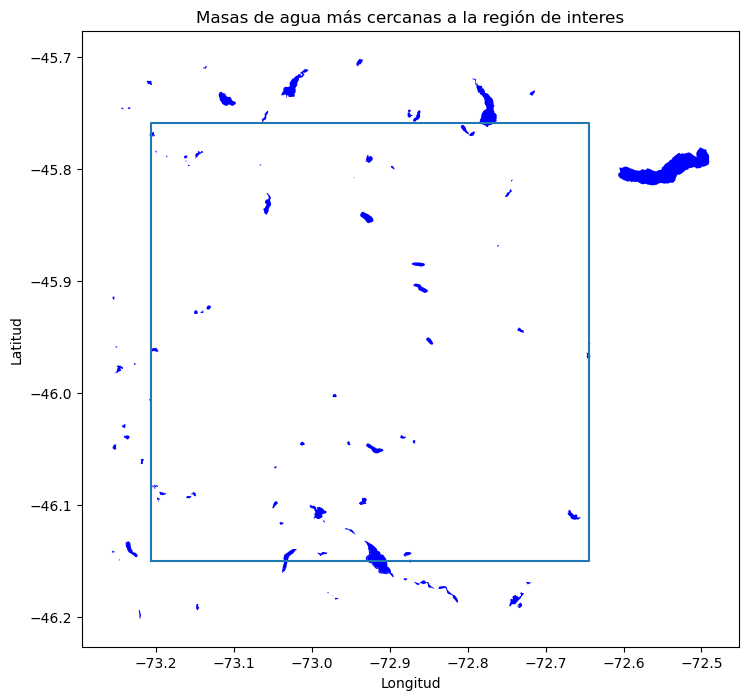

In [15]:
pos_x, pos_y = poligono_interes.boundary.xy


fig, ax = plt.subplots(figsize=(12,8))
rios.sort_values(by='distance')[:100].plot(color='blue', ax=ax)
plt.plot(pos_x, pos_y)
plt.title("Masas de agua más cercanas a la región de interes")
plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.show()

### Datos del El Centro de Ciencia del Clima y la Resiliencia (CR2)

Extraido de https://cr2.cl/download/cr2_qflxdaily_2018-zip/

In [16]:
caudal = pd.read_csv('cr2_qflxDaily_2018/cr2_qflxDaily_2018/cr2_qflxDaily_2018.txt', sep=',')

In [17]:
caudal.head()

,codigo_estacion,01201005,01201002,01201001,01001002,01201003,01001003,01001001,01020002,01020004,...,12863002,12865001,12582001,12872001,12820001,12876001,12878001,12876004,12825002,12930001
0,institucion,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,...,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA,DGA
1,fuente,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,...,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web,dga_web
2,nombre,Rio Caracarani En Humapalca,Rio Caracarani En Alcerreca,Rio Colpitas En Alcerreca,Rio Caquena En Vertedero,Rio Lluta En Alcerreca,Rio Colpacagua En Desembocadura,Rio Caquena En Nacimiento,Rio Desaguadero Cotacotani,"Canal Lauca En Sifon N"" 1 (Km. 3.3)",...,Rio San Martin En San Sebastian,Rio Chico En Ruta Y-895,Rio San Juan En Desembocadura,Rio Herminita En Ruta Y-895,Rio Caleta En Tierra Del Fuego,Rio Grande En Tierra Del Fuego,Rio Rasmussen En Frontera (Estancia VicuÑA),Rio Catalina En Pampa Guanacos,Rio Azopardo En Desembocadura,Rio Robalo En Puerto Williams
3,altura,3908,3253,3251,0,3550,0,4385,4500,4384,...,0,0,8,0,280,100,0,0,32,80
4,latitud,-17.8428,-17.9833,-17.9919,-17.9942,-18.0036,-18.0156,-18.0769,-18.1936,-18.2294,...,-53.3164,-53.5436,-53.65,-53.8056,-53.8586,-53.8928,-54.0181,-54.0411,-54.5028,-54.9469


In [18]:
caudal_transposed = caudal.transpose()

# Asignar la primera fila como los nombres de las columnas
caudal_transposed.columns = caudal_transposed.iloc[0]

# Eliminar la primera fila
caudal_transposed = caudal_transposed[1:]

# Reiniciar los índices
caudal_transposed.reset_index(inplace=True)

# Renombrar la columna de índices si es necesario
caudal_transposed.rename(columns={'index': 'Codigo Estacion'}, inplace=True)

In [19]:
caudal_transposed

codigo_estacion,Codigo Estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,...,2018-02-28,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09
0,01201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,01201002,DGA,dga_web,Rio Caracarani En Alcerreca,3253,-17.9833,-69.6283,12,Rio Lluta,120,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,01201001,DGA,dga_web,Rio Colpitas En Alcerreca,3251,-17.9919,-69.6256,12,Rio Lluta,120,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,01001002,DGA,dga_web,Rio Caquena En Vertedero,0,-17.9942,-69.255,10,Altiplanicas,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,01201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,...,2.651,2.445,2.351,2.498,2.602,2.386,2.315,2.481,2.301,2.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,12876001,DGA,dga_web,Rio Grande En Tierra Del Fuego,100,-53.8928,-68.8844,128,Tierra Del Fuego,1287,...,5.652,5.349,5.147,5.289,5.127,4.662,4.581,4.864,4.945,5.41
805,12878001,DGA,dga_web,Rio Rasmussen En Frontera (Estancia VicuÑA),0,-54.0181,-68.6528,128,Tierra Del Fuego,1287,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
806,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.7975,128,Tierra Del Fuego,1287,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
807,12825002,DGA,dga_web,Rio Azopardo En Desembocadura,32,-54.5028,-68.8244,128,Tierra Del Fuego,1282,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [20]:
geometry = [Point(xy) for xy in zip(caudal_transposed["longitud"], caudal_transposed["latitud"])]
geo_df = gpd.GeoDataFrame(caudal_transposed, geometry=geometry)

# Definir el sistema de referencia espacial (CRS), por ejemplo, WGS84
geo_df.crs = "EPSG:4326"

# Mostrar el GeoDataFrame
geo_df

codigo_estacion,Codigo Estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,...,2018-03-01,2018-03-02,2018-03-03,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,geometry
0,01201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,POINT (-69.69940 -17.84280)
1,01201002,DGA,dga_web,Rio Caracarani En Alcerreca,3253,-17.9833,-69.6283,12,Rio Lluta,120,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-69.62830 -17.98330)
2,01201001,DGA,dga_web,Rio Colpitas En Alcerreca,3251,-17.9919,-69.6256,12,Rio Lluta,120,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-69.62560 -17.99190)
3,01001002,DGA,dga_web,Rio Caquena En Vertedero,0,-17.9942,-69.255,10,Altiplanicas,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-69.25500 -17.99420)
4,01201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,...,2.445,2.351,2.498,2.602,2.386,2.315,2.481,2.301,2.197,POINT (-69.63310 -18.00360)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,12876001,DGA,dga_web,Rio Grande En Tierra Del Fuego,100,-53.8928,-68.8844,128,Tierra Del Fuego,1287,...,5.349,5.147,5.289,5.127,4.662,4.581,4.864,4.945,5.41,POINT (-68.88440 -53.89280)
805,12878001,DGA,dga_web,Rio Rasmussen En Frontera (Estancia VicuÑA),0,-54.0181,-68.6528,128,Tierra Del Fuego,1287,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-68.65280 -54.01810)
806,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.7975,128,Tierra Del Fuego,1287,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-68.79750 -54.04110)
807,12825002,DGA,dga_web,Rio Azopardo En Desembocadura,32,-54.5028,-68.8244,128,Tierra Del Fuego,1282,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-68.82440 -54.50280)


<Axes: >

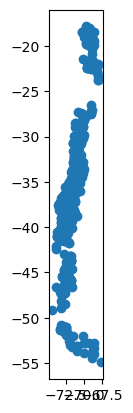

In [21]:
geo_df.plot()

In [22]:
def lineas(row):
    nearestpoint,  = shapely.ops.nearest_points(row['geometry_x'], row['geometry_y'])
    return LineString([nearest_point, row['geometry_y']])

In [23]:
def find_nearest_and_distance(row):
    point1, point2 = shapely.ops.nearest_points(row['geometry'], poligono_interes)
    distance = point1.distance(point2)
    return point1, point2, distance

In [24]:
geo_df[['nearest_point', 'nearest_glaciar', 'distance']] = geo_df.apply(lambda row: pd.Series(find_nearest_and_distance(row)), axis=1)


### Rios más cercanos

<Axes: >

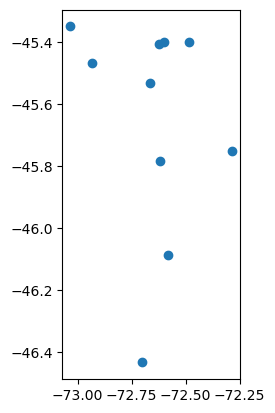

In [25]:
geo_df.sort_values(by='distance')[:10].plot()


In [26]:
geo_df.sort_values(by='distance')[:10]

codigo_estacion,Codigo Estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,...,2018-03-04,2018-03-05,2018-03-06,2018-03-07,2018-03-08,2018-03-09,geometry,nearest_point,nearest_glaciar,distance
734,11335002,DGA,dga_web,Rio Blanco En Desague Lago Caro,270,-45.7833,-72.6167,113,Rio Aisen,1133,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.61670 -45.78330),POINT (-72.6167 -45.7833),POINT (-72.64454442981747 -45.7833),0.027844
739,11500002,DGA,dga_web,Rio Ibanez Antes Junta Cajon,356,-46.0861,-72.5819,115,Rio Baker,1150,...,195.475,189.267,191.971,207.455,214.29,207.273,POINT (-72.58190 -46.08610),POINT (-72.5819 -46.0861),POINT (-72.64454442981747 -46.0861),0.062644
728,11335001,DGA,dga_web,Rio Blanco Bajo Junta Riesco,16,-45.5333,-72.6667,113,Rio Aisen,1133,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.66670 -45.53330),POINT (-72.6667 -45.5333),POINT (-72.6667 -45.758670847843604),0.225371
742,11514001,DGA,dga_web,Rio Murta En Desembocadura,219,-46.4333,-72.7,115,Rio Baker,1151,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.70000 -46.43330),POINT (-72.7 -46.4333),POINT (-72.7 -46.15011764265802),0.283182
727,11405001,DGA,dga_web,Rio Lagunillas En Desague Lago Condor,10,-45.4667,-72.9333,114,Costeras E Islas R Aisen R Baker C. Gral. Mart...,1140,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.93330 -45.46670),POINT (-72.9333 -45.4667),POINT (-72.9333 -45.758670847843604),0.291971
726,11342001,DGA,dga_web,Rio Aysen En Puerto Aysen,32,-45.4058,-72.6231,113,Rio Aisen,1134,...,506.187,405.072,376.004,443.835,754.175,589.588,POINT (-72.62310 -45.40580),POINT (-72.6231 -45.4058),POINT (-72.64454442981747 -45.758670847843604),0.353522
733,11332001,DGA,dga_web,Desague En Lago Monreal En Desague,0,-45.75,-72.2833,113,Rio Aisen,1133,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.28330 -45.75000),POINT (-72.2833 -45.75),POINT (-72.64454442981747 -45.758670847843604),0.361348
725,11337001,DGA,dga_web,Rio Blanco Antes Junta Rio Aysen,21,-45.4,-72.6,113,Rio Aisen,1133,...,222.985,155.521,142.126,220.274,378.798,271.705,POINT (-72.60000 -45.40000),POINT (-72.6 -45.4),POINT (-72.64454442981747 -45.758670847843604),0.361426
724,11318001,DGA,dga_web,Rio Simpson Antes Junta Rio Magniguales,20,-45.4,-72.4833,113,Rio Aisen,1131,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-72.48330 -45.40000),POINT (-72.4833 -45.4),POINT (-72.64454442981747 -45.758670847843604),0.393249
722,11151001,DGA,dga_web,Rio Cuervo En Desembocadura,80,-45.35,-73.0333,111,Costeras E Islas R. Palena - R. Aisen,1115,...,-9999,-9999,-9999,-9999,-9999,-9999,POINT (-73.03330 -45.35000),POINT (-73.0333 -45.35),POINT (-73.0333 -45.758670847843604),0.408671
